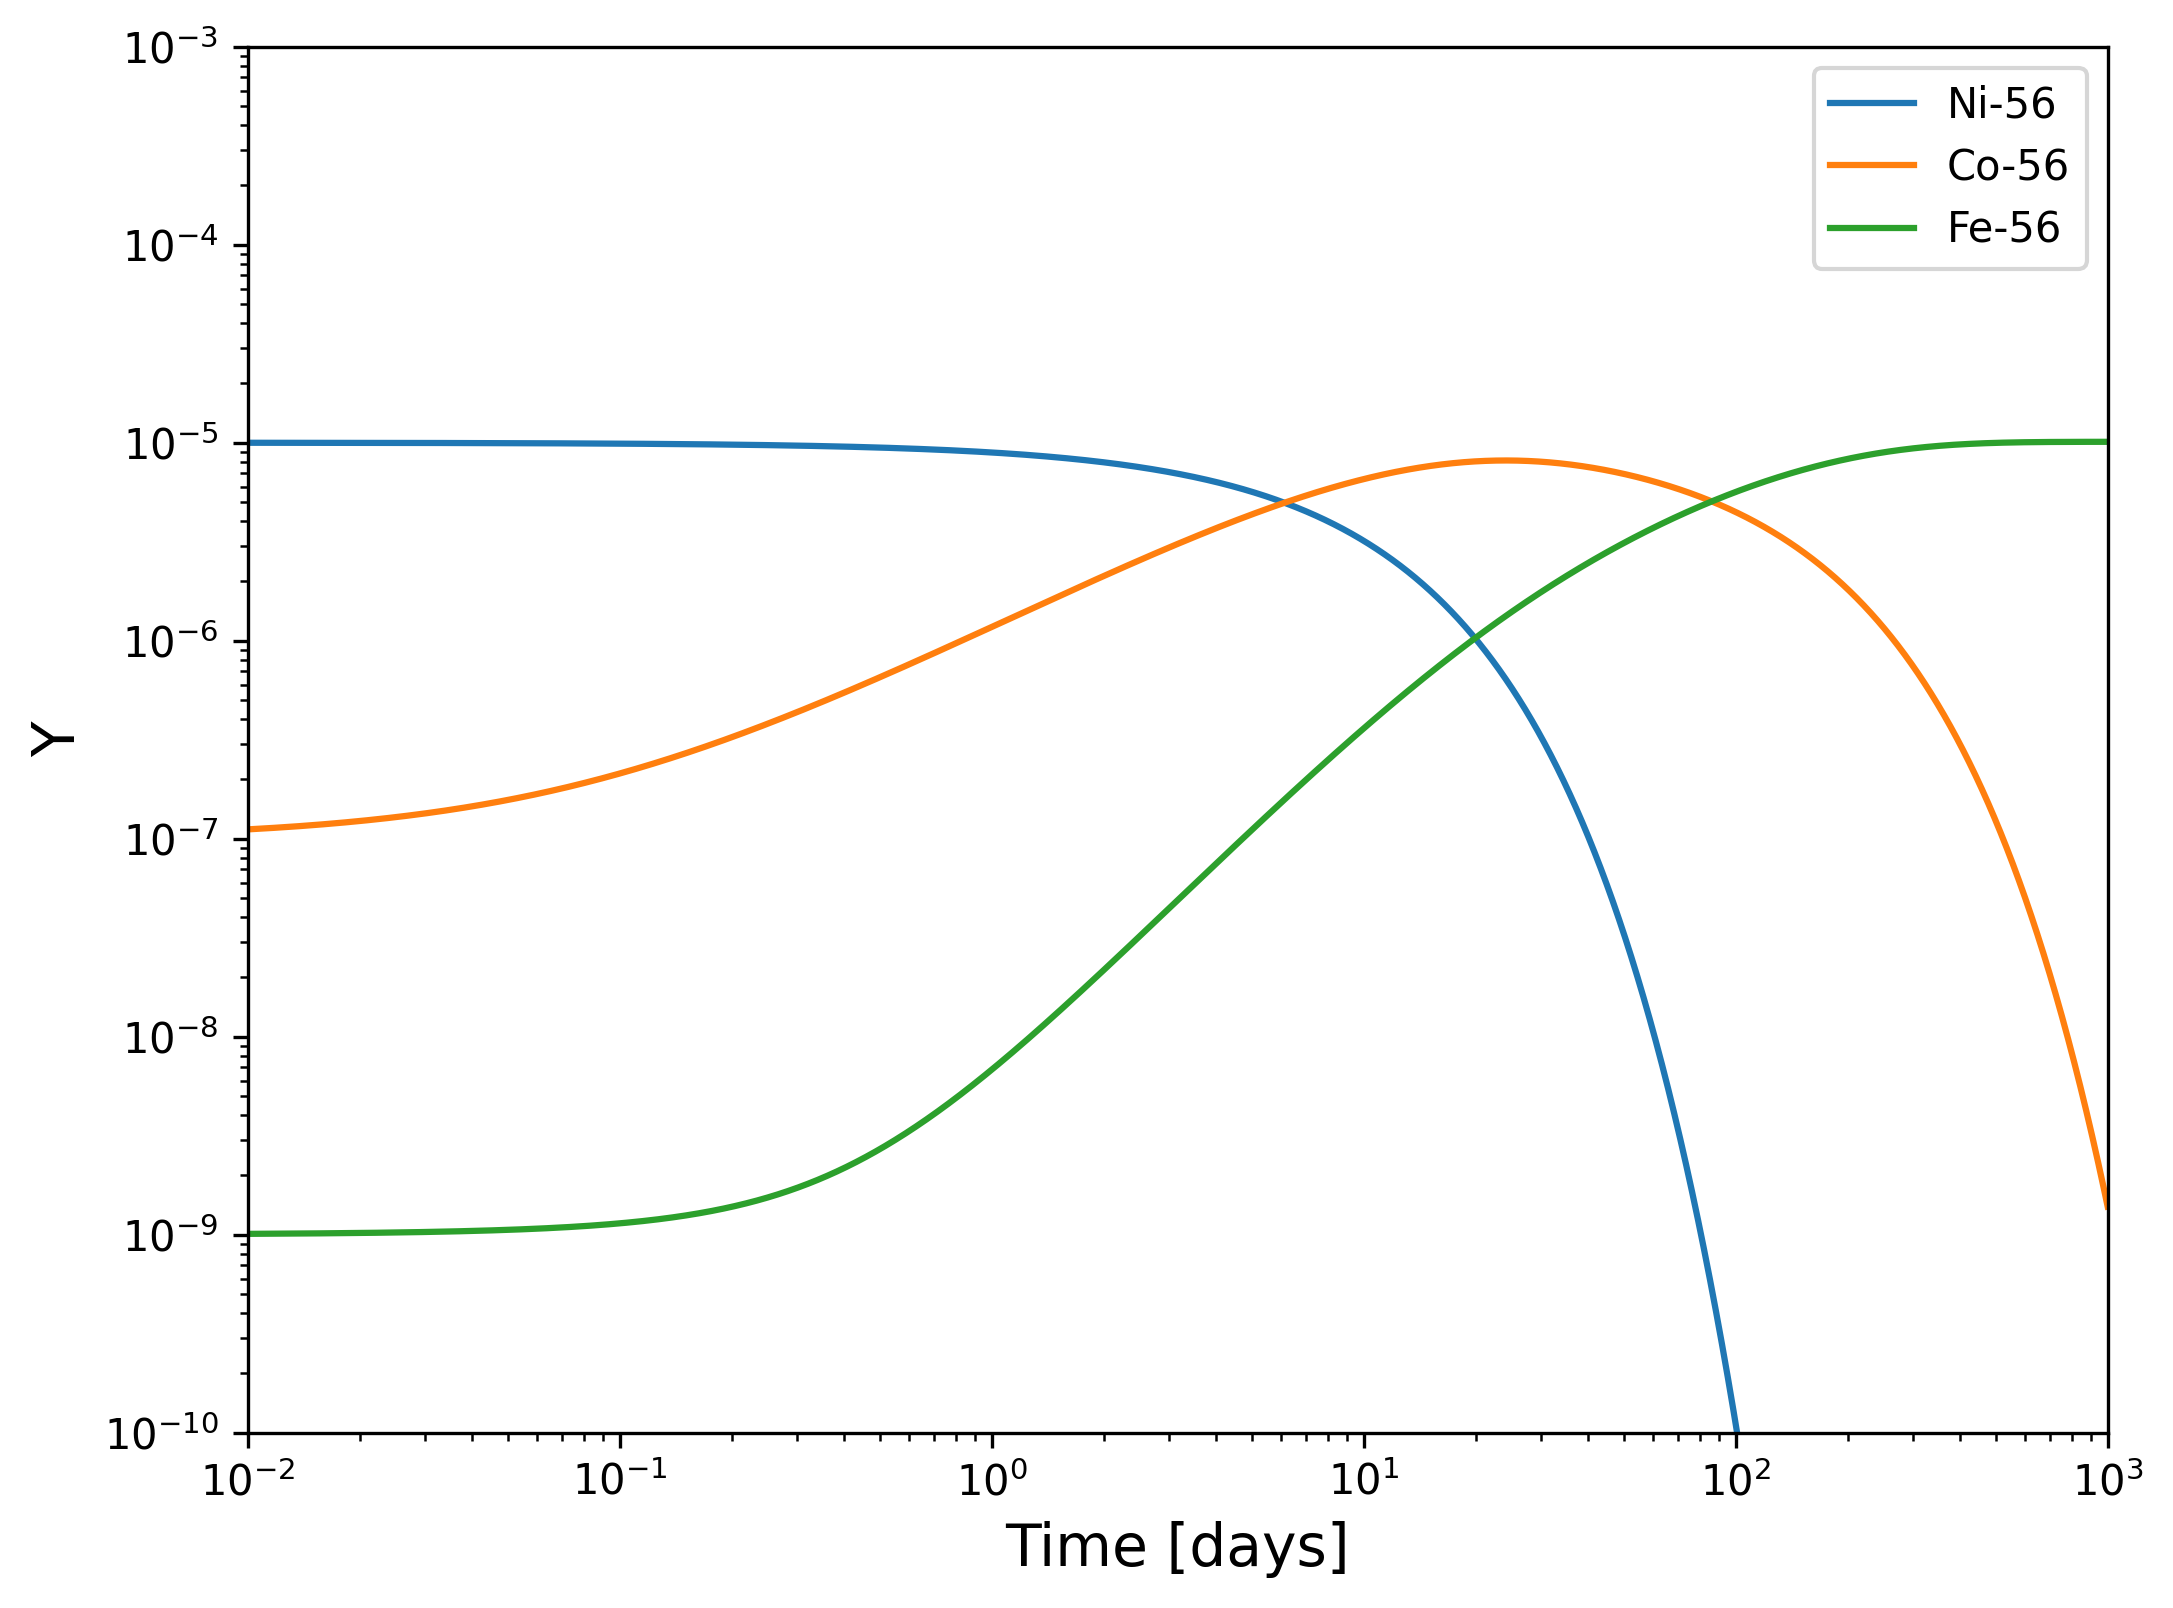

In [3]:

import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from nudca import load_decay_database, load_decay_matrix, RadioactiveDecay

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

init_Y = {'Ni56': 1.e-5, 'Co56':1.e-7, 'Fe56':1.e-9}
radioactive_decay = RadioactiveDecay( init_Y, decay_database, decay_matrix )

times = np.geomspace(1.e-2, 1.e3, 10000) * 86400
nuclides, Y = radioactive_decay.decay_nuclide_abundances(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
ax.plot(times/86400, Y[:, 0], label=f'{nuclides[0]}')
ax.plot(times/86400, Y[:, 1], label=f'{nuclides[1]}')
ax.plot(times/86400, Y[:, 2], label=f'{nuclides[2]}')

ax.set_xlim(1.e-2, 1.e3)
ax.set_ylim(1e-10, 1e-3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

ax.legend()
plt.show()
fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/Y_Ni56Decay.png', dpi=300)


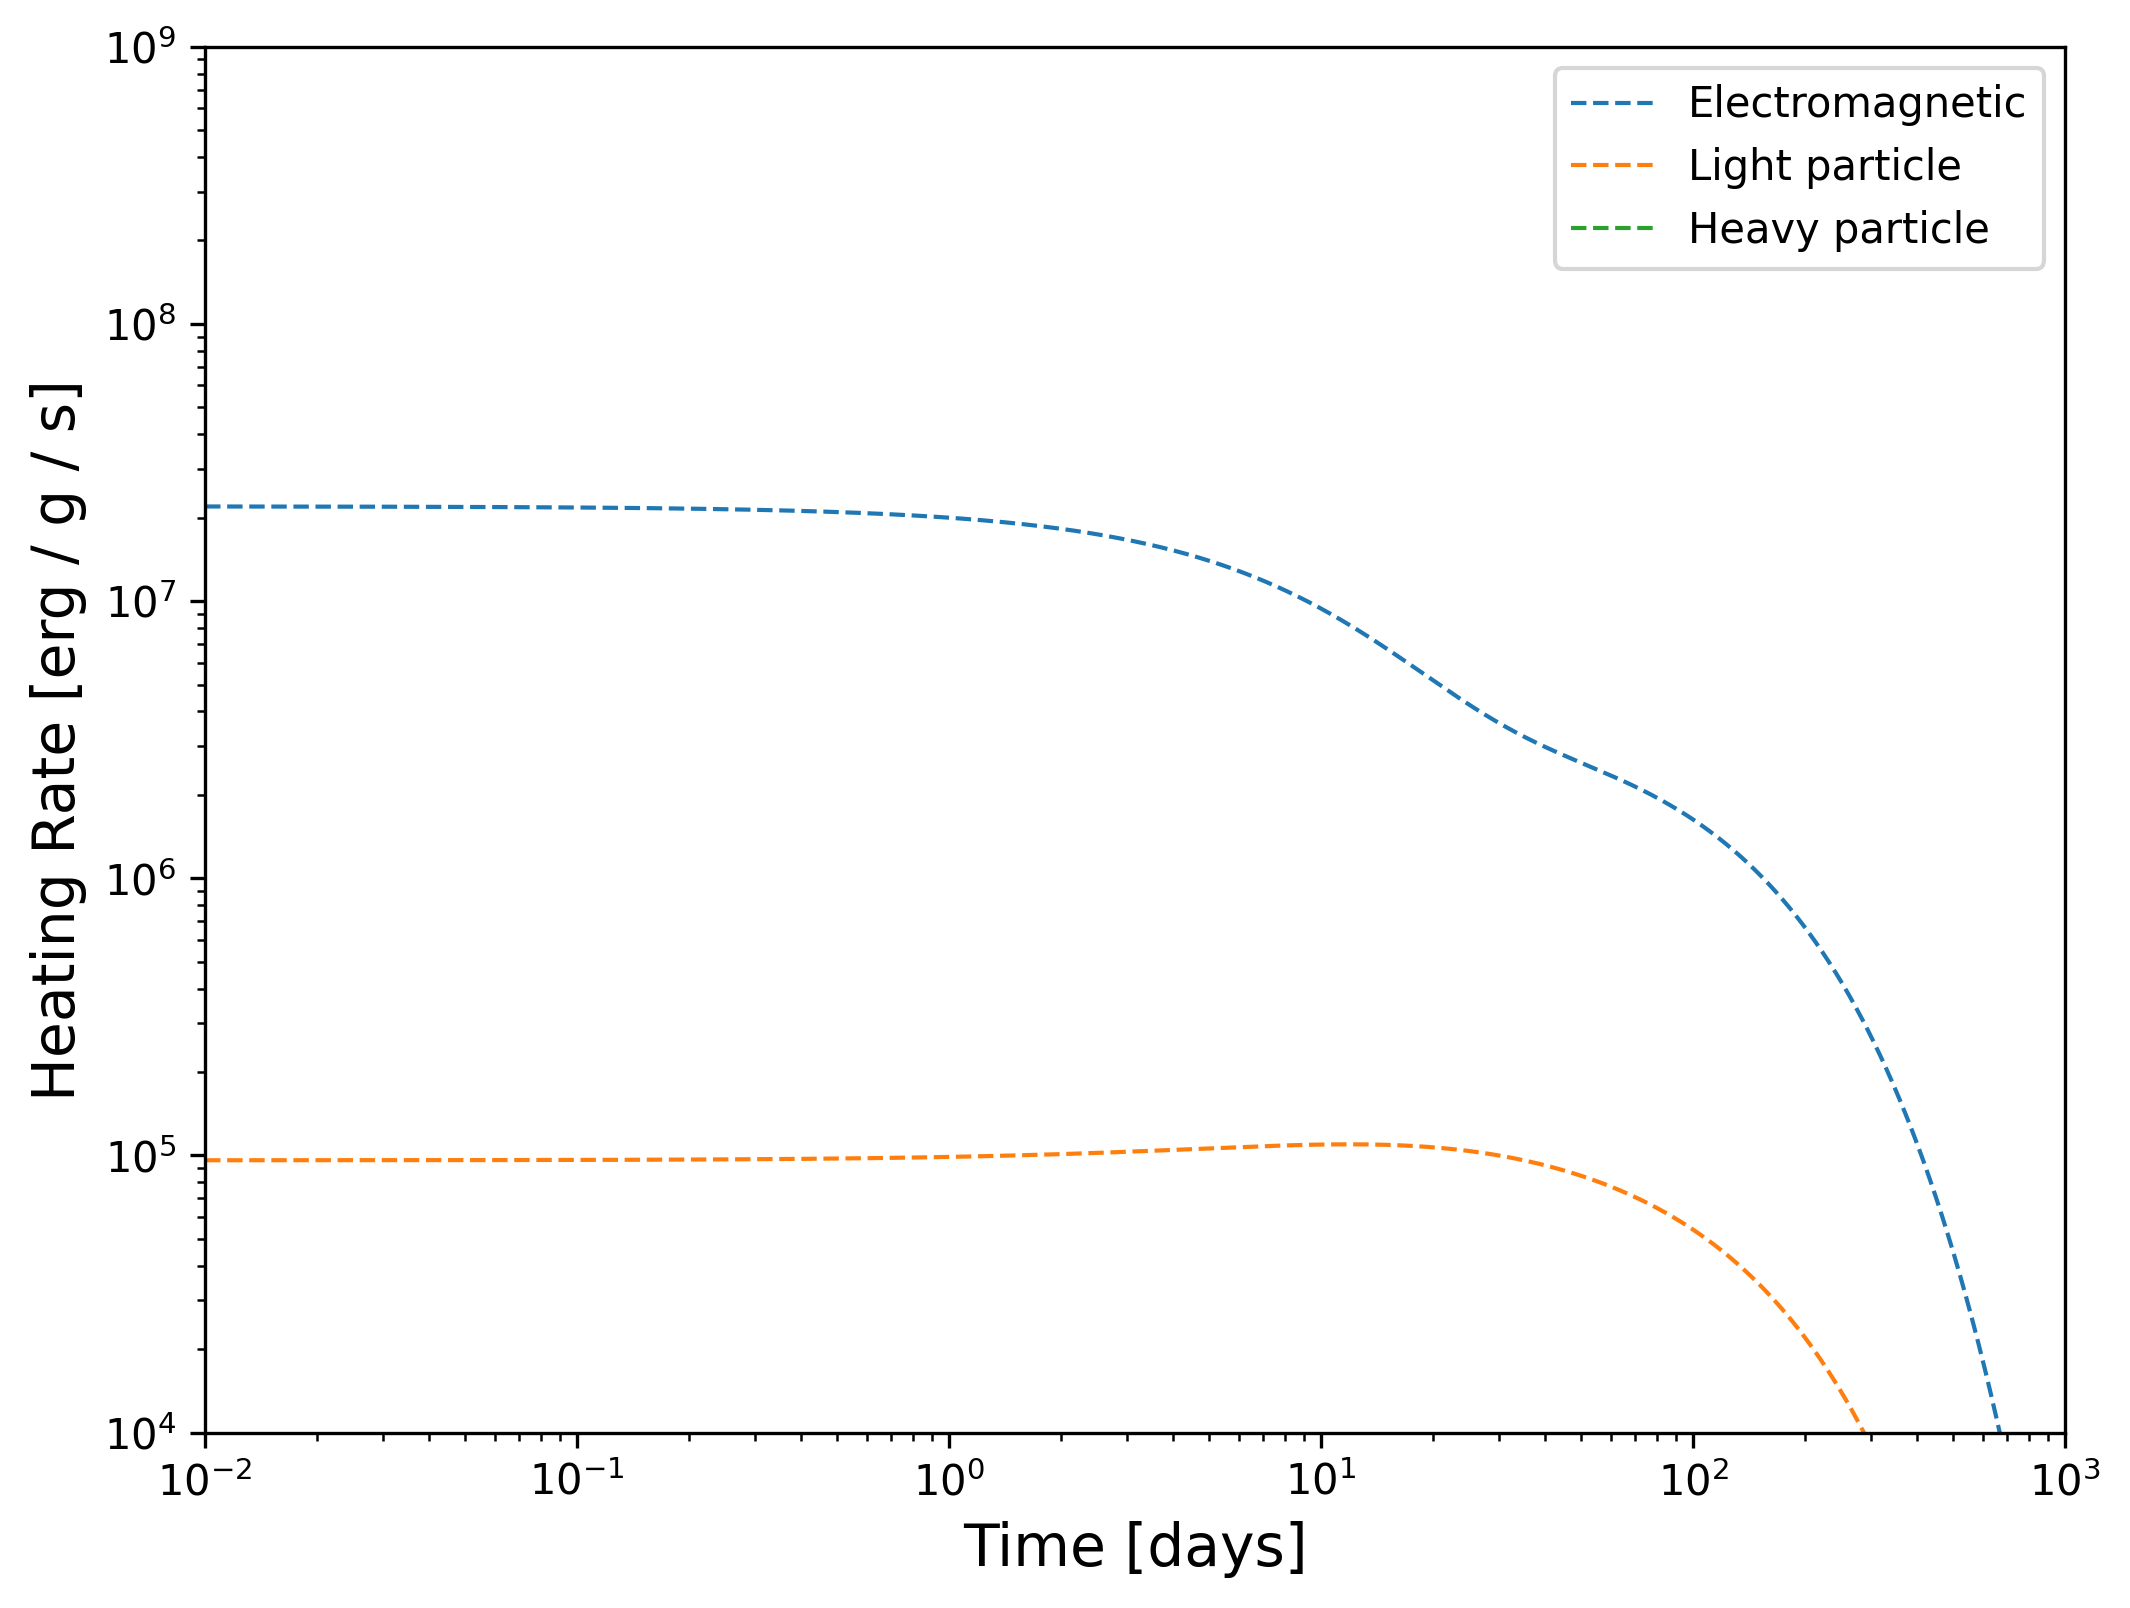

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from nudca import load_decay_database, load_decay_matrix, RadioactiveDecay

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

init_Y = {'Ni56': 1.e-5, 'Co56':1.e-7, 'Fe56':1.e-9}
radioactive_decay = RadioactiveDecay( init_Y, decay_database, decay_matrix )

times = np.geomspace(1.e-2, 1.e3, 10000) * 86400
q_EM = radioactive_decay.decay_heating_rates(times, energy_type='EM')
q_LP = radioactive_decay.decay_heating_rates(times, energy_type='LP')
q_HP = radioactive_decay.decay_heating_rates(times, energy_type='HP')
q = radioactive_decay.decay_heating_rates(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
ax.plot(times/86400, q_EM, ls='--', lw=1, label='Electromagnetic')
ax.plot(times/86400, q_LP, ls='--', lw=1, label='Light particle')
ax.plot(times/86400, q_HP, ls='--', lw=1,  label='Heavy particle')
# ax.plot(times/86400, q, ls='-', lw=2, color='b', label='Total')

ax.set_xlim(1.e-2, 1.e3)
ax.set_ylim(1e4, 1e9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time [days]', fontsize=14)
ax.set_ylabel('Heating Rate [erg / g / s]', fontsize=14)

ax.legend()
plt.show()

# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/HeatingRate_Ni56Decay.png', dpi=300)

# <center> Solar Abundance </center>

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nudca import load_decay_database
from nudca import load_decay_matrix
from nudca import RadioactiveDecay
from nudca.io import Inputer


decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

df_solar = pd.read_excel(Path.cwd().resolve().parent.joinpath('nudca/data/solar_r_abundance_pattern.xlsx'))
# Y_ini_dict = filter_Y(df_solar['Z'], df_solar['A'], df_solar['Y'])

inputer = Inputer()
Y_ini_dict = inputer.to_dict(df_solar['Z'], df_solar['A'], df_solar['Y'])
radioactive_decay = RadioactiveDecay(Y_ini_dict, decay_database, decay_matrix)

decay_times = np.geomspace(1.e-2, 5.e2, 10000) * 86400

t_start = time.perf_counter()
q_EM = radioactive_decay.decay_heating_rates(decay_times, energy_type='EM')
q_LP = radioactive_decay.decay_heating_rates(decay_times, energy_type='LP')
# q_HP = radioactive_decay.heating_rates_by_type(decay_times, 'HP')
q = radioactive_decay.decay_heating_rates(decay_times)
t_end = time.perf_counter()
print(f'Time taken: {t_end - t_start} seconds')


df_hotokezaka = pd.read_csv(Path.cwd().resolve().parent.joinpath('data/heat85_209_M005_v04_v1_n45.dat'), sep='\s+', header=None)
t_hotokezaka = df_hotokezaka[0].values
q_tot_hotokezaka = df_hotokezaka[1].values
q_gamma_hotokezaka = df_hotokezaka[2].values
q_e_hotokezaka = df_hotokezaka[3].values
q_gamma_th_hotokezaka = df_hotokezaka[4].values
q_e_th_hotokezaka = df_hotokezaka[5].values



<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Maxwell\AppData\Local\Temp\ipykernel_17596\758339969.py:37: SyntaxWarning: invalid escape sequence '\s'
  df_hotokezaka = pd.read_csv(Path.cwd().resolve().parent.joinpath('data/heat85_209_M005_v04_v1_n45.dat'), sep='\s+', header=None)


Time taken: 10.051496100000804 seconds


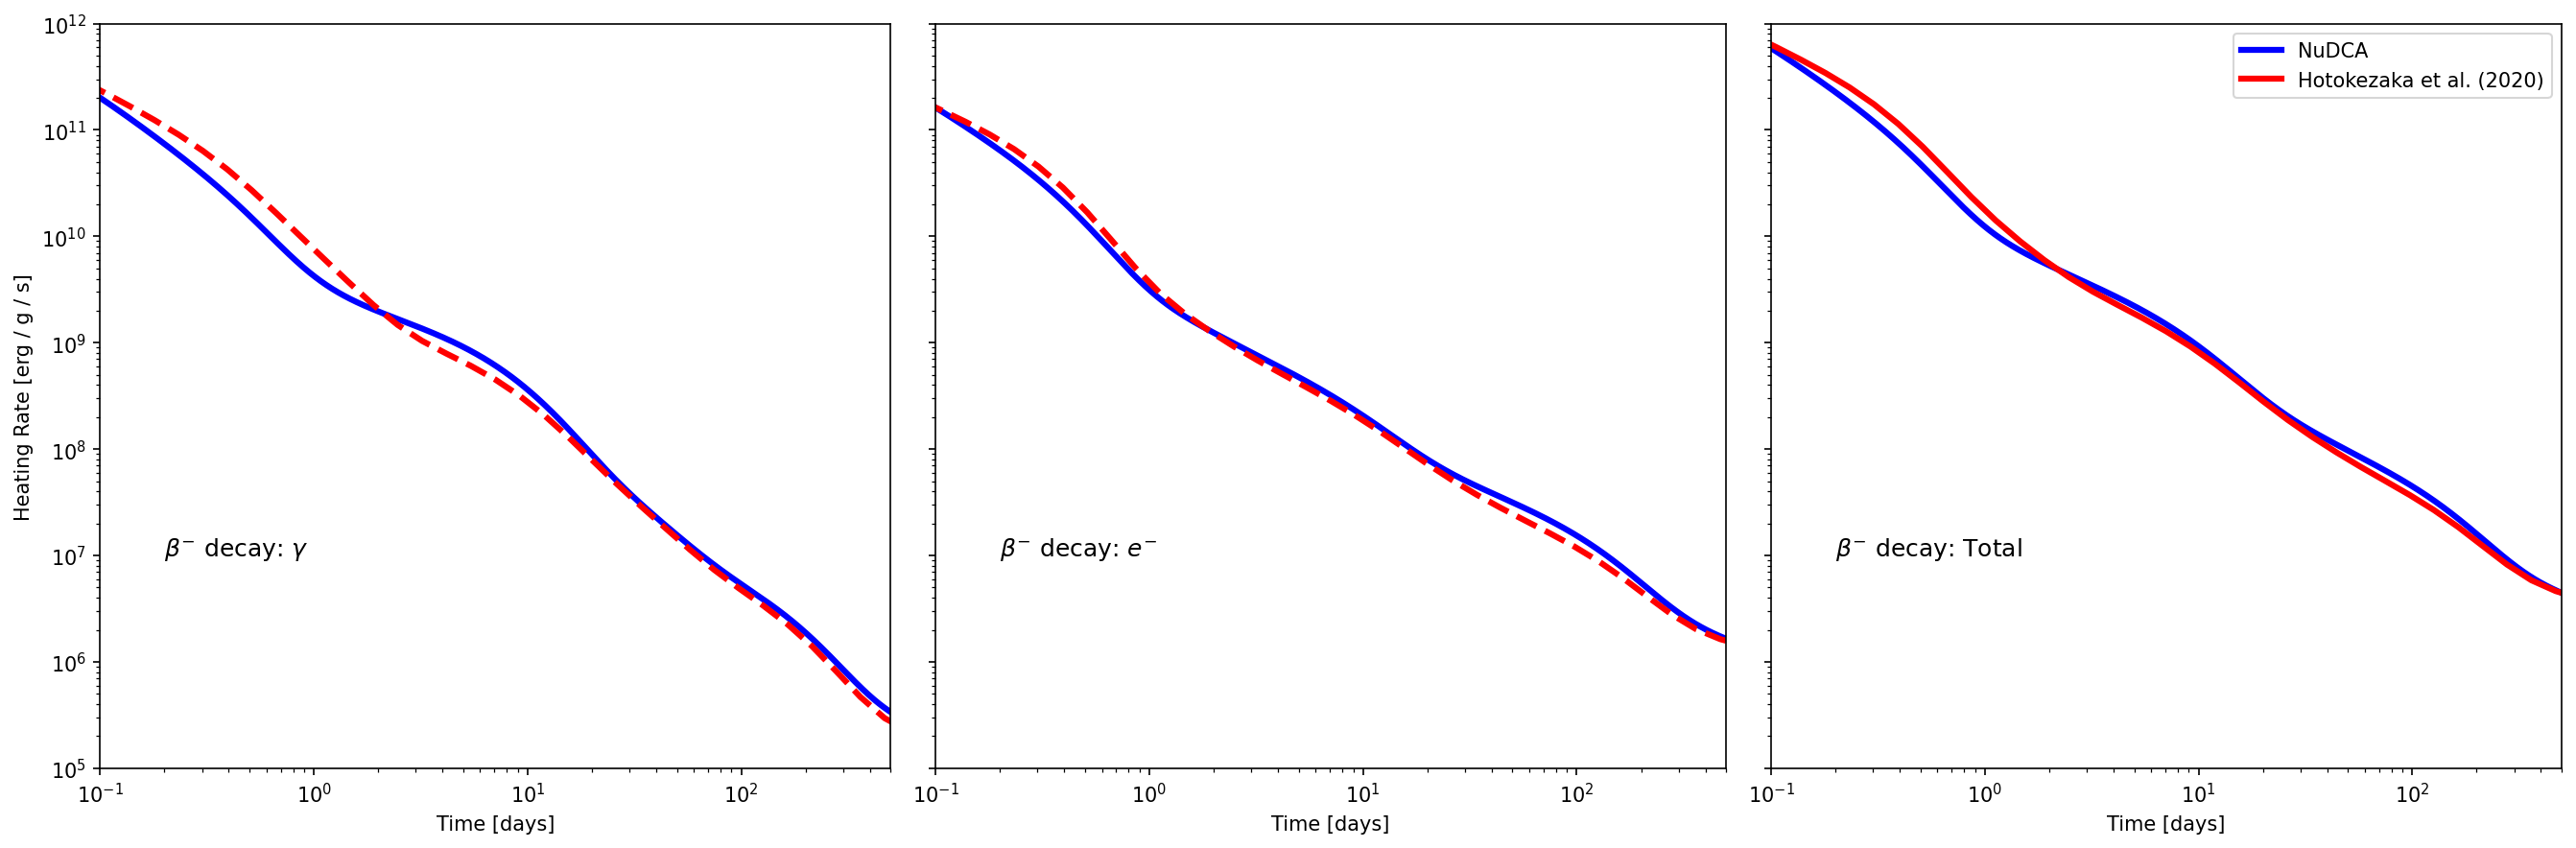

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True, dpi=150)

axs[0].plot(decay_times/86400, q_EM, ls='-', lw=3, color='b')
axs[0].plot(t_hotokezaka, q_gamma_hotokezaka, ls='--', lw=3, color='r')
axs[0].set_xlim(1e-1, 5.e2)
axs[0].set_ylim(1e5, 1e12)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Time [days]')
axs[0].set_ylabel('Heating Rate [erg / g / s]')

axs[1].plot(decay_times/86400, q_LP, ls='-', lw=3, color='b')
axs[1].plot(t_hotokezaka, q_e_hotokezaka, ls='--', lw=3, color='r')
axs[1].set_xlabel('Time [days]')

axs[2].plot(decay_times/86400, q, ls='-', lw=3, color='b', label='NuDCA')
axs[2].plot(t_hotokezaka, q_tot_hotokezaka, ls='-', lw=3, color='r', label='Hotokezaka et al. (2020)')
axs[2].set_xlabel('Time [days]')

axs[0].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $\gamma$', fontsize=12)
axs[1].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: $e^{-}$', fontsize=12)
axs[2].text(2.e-1, 1.e7, r'$\beta^{-}$ decay: Total', fontsize=12)

axs[2].legend()
plt.tight_layout()
plt.show()

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().resolve().parent))

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nudca import load_decay_database
from nudca import load_decay_matrix
from nudca import RadioactiveDecay
from nudca.io import filter_Y, to_dict


decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_matrix = load_decay_matrix(data_source='ENDF-B-VIII.1_decay')

df_solar = pd.read_excel(Path.cwd().resolve().parent.joinpath('nudca/data/solar_r_abundance_pattern.xlsx'))
# Y_ini_dict = filter_Y(df_solar['Z'], df_solar['A'], df_solar['Y'])
Y_ini_dict = to_dict(df_solar['Z'], df_solar['A'], df_solar['Y'])
radioactive_decay = RadioactiveDecay(Y_ini_dict, decay_database, decay_matrix)

decay_times = np.geomspace(1.e-2, 5.e2, 10000) * 86400

t_start = time.perf_counter()
radioactive_decay.decay_process(decay_times)
t_end = time.perf_counter()
print(f'Time taken: {t_end - t_start} seconds')


Time taken: 3.9774889000109397 seconds
